# Quantum Wave Function a Bounded particle:

At time t = 0 an electron is released in a region between $-a$ to $+a$ with uniform probability; 

$\Psi (x,0) =   A,  \, -a<x<a \, \, and \, \, 0, \, elsewhere $

The solution is given in the book Introduction to Quantum Mechanics by D. J. Griffiths (3rd ed) page: 76.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth
import numpy as np
sns.set_style('darkgrid')

Text(0, 0.5, 'psi^2')

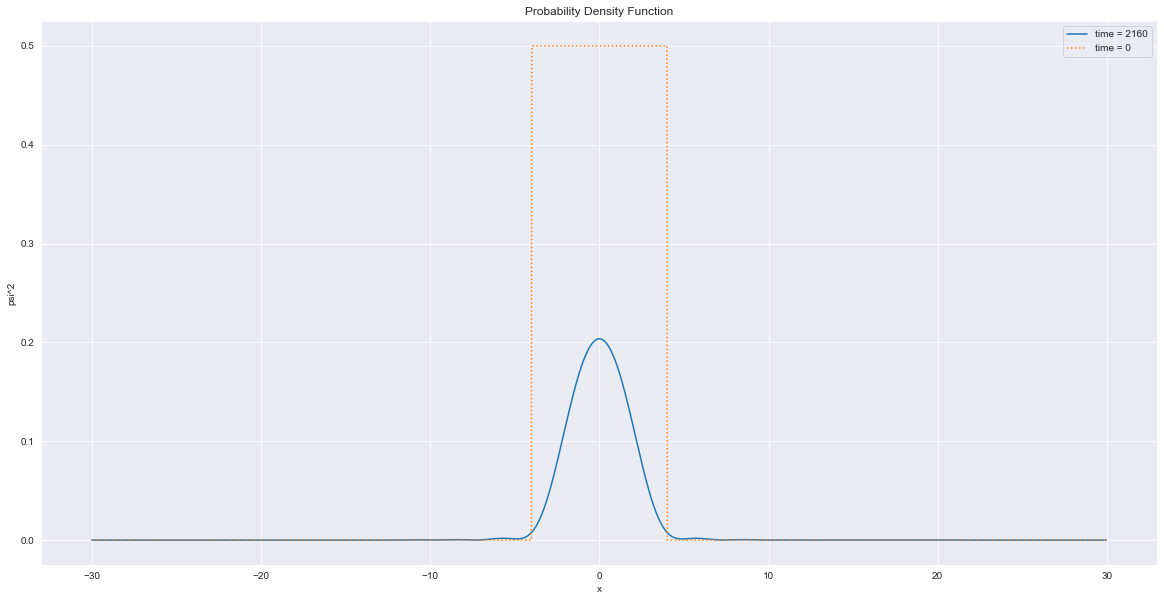

In [40]:
def f1(x,k,t):
    return (a/mth.sqrt(2*np.pi)) * (np.sinc(k*a)) * (np.cos(k*x - ((hc*(k**2)*t)/(2*m))))  # defined the function to integrate

def f2(x,k,t):
    return (a/mth.sqrt(2*np.pi)) * (np.sinc(k*a)) * (np.sin(k*x - ((hc*(k**2)*t)/(2*m))))  # defined the function to integrate


# defined initial conditions

m = 9.109e-31 # mass of electron in kg
hc = 1.05457e-34
a = 0.5
kl = -5*a
kr = 5*a
n = 1000
h = (kr-kl)/n # step size for k

# Now let's integrate
    
# After t = 0, the later time should be chosen as t = ma^2/h

for t in range(2160,3000,2000): # time loop
    
    xl = -15.0
    xr = 15.0
    N = 2000
    H = (xr-xl)/N # step size for x
    x = xl
    
    # defined the lists

    X = []
    F = []
    
    for _ in range(N): # x loop
    
        integration1 = f1(x,kl,t) + f1(x,kr,t)

        for i in range(n): # 1st integration loop
        
            j1 = kl + i*h

            if i%2 == 0:
                integration1 = integration1 + 2 * f1(x,j1,t)  # for even terms
  
            else:
                integration1 = integration1 + 4 * f1(x,j1,t)  # for odd terms

        integration1 = integration1 * h/3
    
        integration2 = f2(x,kl,t) + f2(x,kr,t)

        for i in range(n): # 2nd integration loop
        
            j2 = kl + i*h

            if i%2 == 0:
                integration2 = integration2 + 2 * f2(x,j2,t)  # for even terms
            else:
                integration2 = integration2 + 4 * f2(x,j2,t)  # for odd terms

        integration2 = integration2 * h/3   
    
        psi2 = integration1**2 + integration2**2
        X.append(x/a)
        F.append(psi2)
        x = x + H
            
    #print(X,F)
    plt.plot(X, F, label = "time = 2160")
    plt.title("Probability Density Function")
    plt.legend()
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.xlabel("x")
    plt.ylabel("psi^2")


def f(x):
    if x>-2 and x<2:
        return 1/(2*a)
    else:
        return 0
    
X = []
F = []
x = xl
    
for _ in range(N):
    
    F.append(a*f(x))
    X.append(x/a)
    x = x+H
    
plt.plot(X, F, label = "time = 0", linestyle = 'dotted')
plt.title("Probability Density Function")
plt.legend()
plt.rcParams["figure.figsize"] = (20, 10)
plt.xlabel("x")
plt.ylabel("psi^2")